In [10]:
import sys
sys.path.append('..')
from src.kitti import *
from src.boundingbox import format_yolo_output
import numpy as np
import cv2
import json
%matplotlib inline

In [30]:
IMAGES_LOCATION = "/data/urbinn/datasets/kitti/sequences/00/image_2/"
YOLO_LOCATION = "/data/urbinn/darknet/output/seq00_image02/objects.json"

yolo_output = json.load(open(YOLO_LOCATION))

def imgread(file):
    img = cv2.imread(file)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [38]:
def draw_all_classifications_with_points(yolo_output, image, filter_points=False):
    classifications = format_yolo_output(YOLO_LOCATION)
    image_path = "{}{}".format(IMAGES_LOCATION, image)
    img = imgread(image_path)
    
    for clas in classifications[image]:
        clas.draw(img, show_classifier = True)
    
    print(classifications[image])
    frame = Frame(image_path)
    observations = frame.get_observations()
    points = []
    
    for obs in observations:
        x, y = observations[0].cx, observations[0].cy
        for clas in classifications[image]:
            if clas.contains(obs):
                points.append(obs)
    
    if filter_points:
        show(draw_observations(points, img))
    
    show(draw_observations(observations, img))

[<src.boundingbox.BoundingBox object at 0x7fef7ad96ac8>, <src.boundingbox.BoundingBox object at 0x7fef7ad96b00>, <src.boundingbox.BoundingBox object at 0x7fef7ad96b38>, <src.boundingbox.BoundingBox object at 0x7fef7ad96b70>, <src.boundingbox.BoundingBox object at 0x7fef7ad96ba8>]


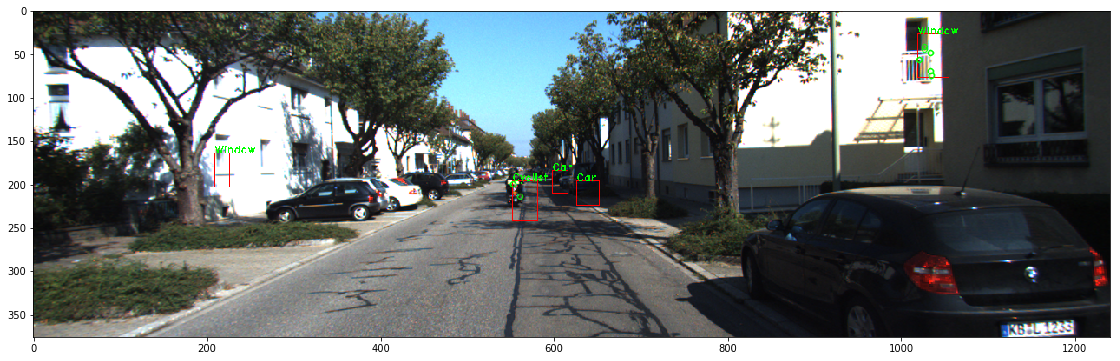

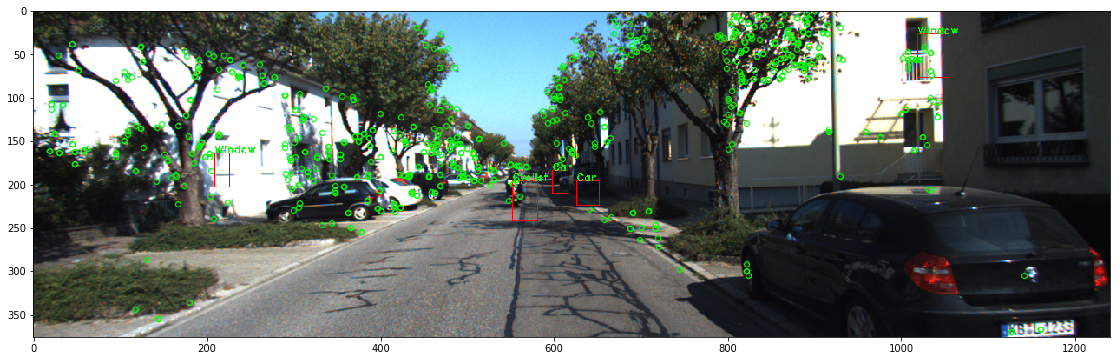

In [68]:
draw_all_classifications_with_points(YOLO_LOCATION, "000004.png", True)